In [1]:
from importlib import reload

import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from tqdm.auto import trange, tqdm
from sampling_functions import generate_pureRandomSample
from simulation_functions import test_sampling_function_max_a, run_simulation, test_sampling_function_nsims
from util import save_to_csv, save_results, SEED

save_files = False

# reload(mandelbrot_matrix)

plt.style.use('seaborn')

re_lim=(-2,1) 
im_lim=(-1.25,1.25)

theta = 1.506793
run_full = False

## Threshold number
We first determine the threshold size for the mandelbrot set
We do this y fixing the sample size to 1000 and the number of points per sample to 100000

In [14]:
# Run this simulation tonight! Change threshold list!

sample_size = 10000
n_points = 10000

threshold_list = np.arange(2200, 2400, 200)
# threshold_list[0] = 50

mean_list = []
std_list = []
time_list = []
data = []
area = (re_lim[1] - re_lim[0]) * (im_lim[1]-im_lim[0])

np.random.seed(SEED) 
run_full = True
save_files = True
if run_full:

    for threshold in tqdm(threshold_list):
        print(f"Simulation for #iterations={threshold}")
        mean, std, sim_time, _ = run_simulation(sample_size, n_points, threshold, re_lim=re_lim, im_lim=im_lim)
        
        mean_list.append(mean)
        std_list.append(std)
        time_list.append(sim_time)
    
    run_full=False

    if save_files:
        save_to_csv(f"threshold_computation_ss={sample_size}_np={n_points}",datalists=
                [
                    threshold_list,
                    mean_list,
                    std_list,
                    time_list
                ],
                headers=["n_points", "mean", "std", "computation_time"])


  0%|          | 0/1 [00:00<?, ?it/s]

Simulation for #iterations=2200


100%|██████████| 1/1 [54:07<00:00, 3247.06s/it]

saved to file!


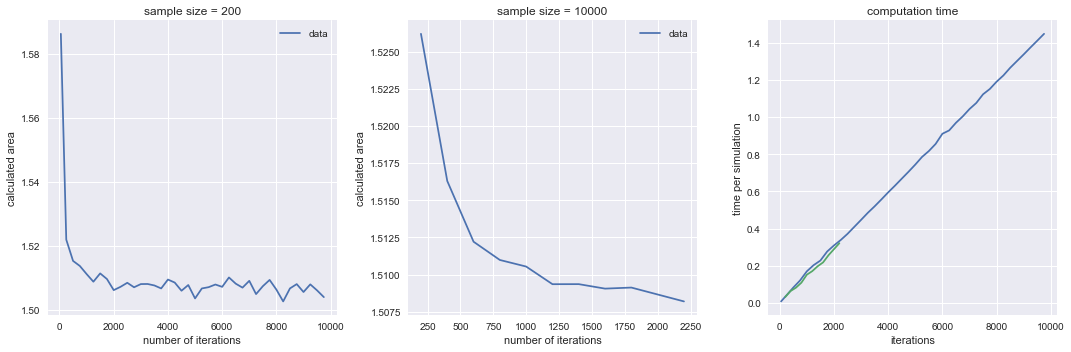

In [25]:
df1 = pd.read_csv(f"./simulation_data/threshold_computation_ss=200_np=10000")
df2 = pd.read_csv(f"./simulation_data/threshold_computation_ss=10000_np=10000")

threshold_list = [df1["n_points"].tolist(),df2["n_points"].tolist()]
mean_list = [df1["mean"].tolist(),df2["mean"].tolist()]
std_list = [df1["std"].tolist(),df2["std"].tolist()]
time_list = [df1["computation_time"].tolist(),df2["computation_time"].tolist()]
# mean_list = df1["mean"].tolist()
# std_list = df1["std"].tolist()
# time_list = df1["computation_time"]

titles= ["sample size = 200", "sample size = 10000"] 
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i in range(len(threshold_list)):
    ax[i].plot(threshold_list[i], mean_list[i], label="data")
    ax[i].legend()
    ax[i].set(
    title=titles[i],
    xlabel="number of iterations",
    ylabel="calculated area",
    )
    
ax[2].plot(threshold_list[0], time_list[0])
ax[2].plot(threshold_list[1], time_list[1])
ax[2].set(xlabel="iterations", ylabel="time per simulation",title="computation time")
plt.tight_layout()

# ax.plot(threshold_list, theta*np.ones(len(threshold_list)))
# ax.plot(threshold_list, std_list)
# ax.fill_between(threshold_list, 
#                 mean_list+np.array(std_list), 
#                 mean_list-np.array(std_list), 
#                 alpha=0.5,
#                 label="$\sigma$")

# ax.legend()
# ax.set(
#     xlabel="number of iterations",
#     ylabel="calculated area",
#     )

plt.savefig("number-of-iterations-comp.png", dpi=600)

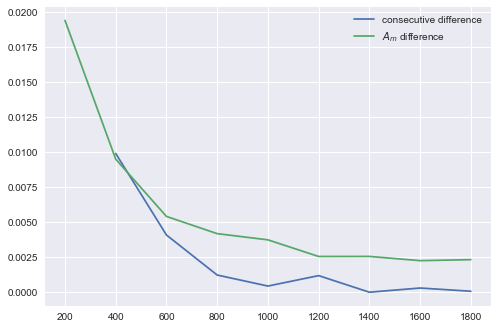

In [13]:
plt.plot(threshold_list[1:], np.abs(mean_list[1:]-np.array(mean_list[:-1])), label="consecutive difference")
plt.xlabel("iterations")
plt.ylabel("difference")
# plt.plot(threshold_list, np.array(mean_list)-theta, label="$A_m$ difference")
plt.legend()

## Determining sample size 

In [7]:
# determine Sample size
sample_size = 1000
n_points_list = [100, 300, 500, 750, 1000, 1500, 2000, 3000, 4000, 6000, 8000, 10000,12500, 15000, 20000, 30000]

threshold = 1500
mean_list = []
std_list = []
time_list = []
data = []
area = (re_lim[1] - re_lim[0]) * (im_lim[1]-im_lim[0])

np.random.seed(SEED) # type: ignore

if run_full:
    for n_points in tqdm(n_points_list):
        
        mean, std, sim_time , _= run_simulation(sample_size, n_points, threshold, re_lim=re_lim, im_lim=im_lim)
        mean_list.append(mean)
        std_list.append(std)
        time_list.append(sim_time)


In [8]:
if save_files & run_full:
    save_to_csv(f"random_points_computation_ss={sample_size}_th={threshold}-1",
                [
                    n_points_list,
                    mean_list,
                    std_list,
                    time_list
                ],
                headers=["n_points", "mean", "std", "computation_time"])
    save_files = False   


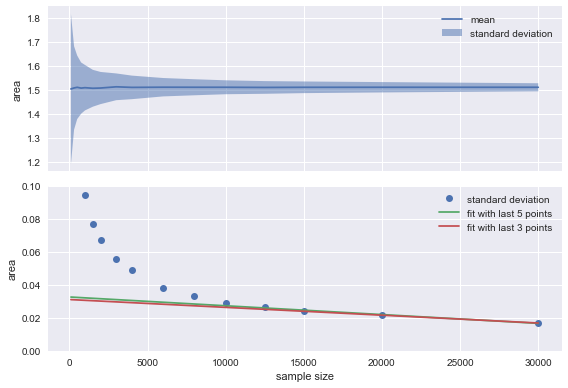

In [46]:
  
import pandas as pd 

df = pd.read_csv("./simulation_data/random_points_computation_ss=1000_th=1500")

n_points_list = df["n_points"].to_list()
mean_list = df["mean"].tolist()
std_list = df["std"].to_list()
time_list = df["computation_time"]

m1, b1 = np.polyfit(n_points_list[12:], std_list[12:], 1)
m2, b2 = np.polyfit(n_points_list[13:], std_list[13:], 1)
m3, b3 = np.polyfit(n_points_list[14:], std_list[14:], 1)



Ais_Ajs = []
Ais_std = []
Ais_xax = []
for i in range(len(mean_list)-1):
    diffstd = np.abs(std_list[i+1] - std_list[i])
    diffmean= np.abs(mean_list[i+1] - mean_list[i])
    diffx = (n_points_list[i+1] - n_points_list[i])
    
    Ais_Ajs.append(diffmean)
    Ais_std.append(diffstd)
    Ais_xax.append(diffx)

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(n_points_list, mean_list, label="mean")
ax[0].fill_between(n_points_list,
                   mean_list+np.array(std_list), 
                   mean_list-np.array(std_list), label="standard deviation",
                   alpha=0.5
                )
ax[0].legend()
ax[0].set(
    ylabel="area",
    )

ax[1].plot(n_points_list, std_list, "o", label="standard deviation")
ax[1].plot(np.array(n_points_list), m1*np.array(n_points_list) + b1, label="fit with last 5 points")
# ax[1].plot(np.array(n_points_list), m2*np.array(n_points_list) + b2, label="fit with last 3 points")
ax[1].plot(np.array(n_points_list), m3*np.array(n_points_list) + b3, label="fit with last 3 points")
# ax[1].plot(n_points_list[1:], Ais_Ajs, label="dmean")
# ax[1].plot(n_points_list[1:], Ais_std, label="dstd")
ax[1].set(ylabel="area",
            xlabel="sample size",
            ylim=(0.0, 0.1)
          )
ax[1].legend()
plt.tight_layout()
plt.savefig("number-of-simulations-comp.png", dpi=600)

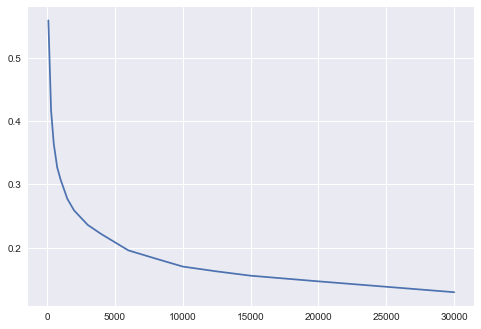

In [ ]:
plt.plot(n_points_list, std_list)

In [4]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from simulation_functions import test_sampling_function_nsims

test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

n_simulations = 100
threshold = 1000
n_samples = 144

results = [] 
results_data = []

for sampling_function in test_functions:
    result, data = test_sampling_function_nsims(sampling_function,
                                              n_simulations=n_simulations,
                                              threshold=threshold,
                                              n_points=n_samples)
    result.explain()


100%|██████████| 100/100 [00:01<00:00, 62.17it/s]


Interval reached after 100 in 2 seconds. mean=1.5578, std=0.2292
This means for a 95.0% confidence interval, we have a=0.0449 and X=1.55781
                 


100%|██████████| 100/100 [00:01<00:00, 57.90it/s]


Interval reached after 100 in 2 seconds. mean=1.5370, std=0.1684
This means for a 95.0% confidence interval, we have a=0.033 and X=1.53698
                 


100%|██████████| 100/100 [00:01<00:00, 56.11it/s]

Interval reached after 100 in 2 seconds. mean=1.5354, std=0.1019
This means for a 95.0% confidence interval, we have a=0.02 and X=1.53542
                 


# calculating the confidence interval for different sampling functions


In [ ]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from simulation_functions import test_sampling_function_max_a
test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

samplestep = 100
max_a = 0.001 * theta
threshold = 1000
n_points = 144
results =[]

np.random.seed(SEED) # type: ignore
for sampling_function in test_functions:
    result, data = test_sampling_function_max_a(sampling_function, 
                                    samplestep=samplestep,
                                    max_a=max_a,
                                    threshold=threshold,
                                    n_points=n_points, 
                                    )
    results.append(result)
    result.explain()

In [7]:
import json

with open("simulation_data/d_c_of_s_nsims=1000.json", mode="a") as fp:
    json.dump(results, fp)

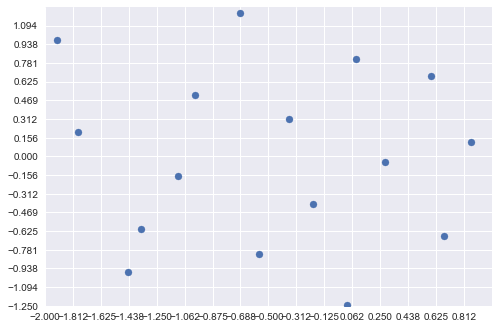

array([-1.44398355-0.96348286j, -1.35324642-0.60785875j,
       -1.78116735+0.20684597j, -1.92289603+0.97409027j,
       -0.56459881-0.81450857j, -1.10597095-0.16359384j,
       -0.99205571+0.50954265j, -0.69352991+1.20213608j,
        0.03101225-1.24509252j, -0.19998429-0.3995159j ,
       -0.36236613+0.31256822j,  0.09176592+0.8147615j ,
        0.68154508-0.66596333j,  0.28265476-0.04948838j,
        0.85923193+0.12339548j,  0.59497165+0.66913648j])

In [5]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal, generate_Orthogonal_inPlace

generate_Orthogonal(4)

In [4]:

%%time

n_sim = 100    # number of simulations to run``
n_size = 1000   # amount of ramdom points
threshold = 1000 # threshold for mandelbrot
data = []



for sim in range(n_sim):
    re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
    count_inside = np.size(np.where(n>=threshold))
    
    # monte carlo
    total_points = n_size
    avg = count_inside/total_points
    
    
    
    data.append(avg)
    # print(avg)
    # average will follow a normal distribution for large values of n i.e. sim
    # alpha = 0.5
    # alpha/2 = 0.25. Z(alpha/2) = 1.96
    # percent confidence interval  = 100*(1-alpha) = 100*(1-0.5) = 95%
    # stop when 2*z*s/(sqrt(sim)) < l. 
    # if we just allow 1% error then 1% of 1.506484 = 0.01506484 ~ 0.015. Therefore our l is 0.015/Area of rectangle
    # l = (0.015)/6 = 0.0025
    # sample mean of (j+1)
    
    # Our samples - averages

prev_estimated_mean = np.sum(data)/(n_sim)
# print(prev_estimated_mean)

mean_difference = 0

for i in range(n_sim):
    mean_difference += (data[i]-prev_estimated_mean)**2
    
prev_estimated_std = mean_difference/(n_sim-1)



l = 0.0025
z = 1.96
estimated_std_deviation = np.sqrt(prev_estimated_std)
acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
# print(acceptable_window)

while(acceptable_window > l):
    
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        #data.append(avg)
        
        
        
        new_estimated_mean = prev_estimated_mean + (avg - prev_estimated_mean)/(n_sim+1)
        new_estimated_std = (1-1/(n_sim))*prev_estimated_std + (n_sim+1)*(new_estimated_mean-prev_estimated_mean)**2
        
        
        n_sim +=1
        # print(n_sim)
        prev_estimated_std = new_estimated_std
        prev_estimated_mean = new_estimated_mean
        
        estimated_std_deviation = np.sqrt(new_estimated_std)
        acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
        # print(acceptable_window)



CPU times: user 12.6 s, sys: 139 ms, total: 12.8 s
Wall time: 13.8 s


In [33]:
%%time

n_sim = 428    # number of simulations to run``
n_size = 1000   # amount of ramdom points
threshold = 1000 # threshold for mandelbrot
data = []

for sim in range(n_sim):
    re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
    count_inside = np.size(np.where(n>=threshold))
    
    # monte carlo
    total_points = n_size
    avg = count_inside/total_points
    
    
    
    data.append(avg)
    # print(avg)
    # average will follow a normal distribution for large values of n i.e. sim
    # alpha = 0.5
    # alpha/2 = 0.25. Z(alpha/2) = 1.96
    # percent confidence interval  = 100*(1-alpha) = 100*(1-0.5) = 95%
    # stop when 2*z*s/(sqrt(sim)) < l. 
    # if we just allow 1% error then 1% of 1.506484 = 0.01506484 ~ 0.015. Therefore our l is 0.015 here
    # sample mean of (j+1)
    
    # Our samples - our averages
    

prev_estimated_mean = np.sum(data)/(n_sim)
print(prev_estimated_mean)

mean_difference = 0

for i in range(n_sim):
    mean_difference += (data[i]-prev_estimated_mean)**2
    
prev_estimated_std = mean_difference/(n_sim-1)


#l = 0.0025
l = 0.0025
z = 1.96
estimated_std_deviation = np.sqrt(prev_estimated_std)
acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
print(acceptable_window)


while(acceptable_window > l):
    
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        #data.append(avg)
        
        
        
        new_estimated_mean = prev_estimated_mean + (avg - prev_estimated_mean)/(n_sim+1)
        new_estimated_std = (1-1/(n_sim))*prev_estimated_std + (n_sim+1)*(new_estimated_mean-prev_estimated_mean)**2
        
        
        n_sim +=1
        print(n_sim)
        prev_estimated_std = new_estimated_std
        prev_estimated_mean = new_estimated_mean
        
        estimated_std_deviation = np.sqrt(new_estimated_std)
        acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
        print(acceptable_window)



0.254
0.23
0.242
0.234
0.257
0.249
0.246
0.259
0.231
0.236
0.276
0.234
0.264
0.248
0.262
0.253
0.266
0.261
0.233
0.257
0.26
0.257
0.254
0.245
0.242
0.255
0.239
0.24
0.266
0.265
0.272
0.256
0.256
0.244
0.273
0.254
0.242
0.241
0.265
0.251
0.25
0.24
0.228
0.239
0.262
0.243
0.257
0.259
0.256
0.256
0.247
0.255
0.245
0.264
0.255
0.259
0.256
0.257
0.261
0.247
0.246
0.256
0.245
0.254
0.246
0.271
0.243
0.255
0.239
0.252
0.245
0.252
0.268
0.259
0.257
0.242
0.239
0.248
0.242
0.262
0.237
0.256
0.256
0.238
0.271
0.249
0.258
0.256
0.249
0.259
0.251
0.249
0.233
0.231
0.257
0.24
0.246
0.269
0.267
0.259
0.255
0.247
0.267
0.264
0.253
0.275
0.255
0.244
0.262
0.278
0.232
0.27
0.226
0.249
0.26
0.254
0.248
0.252
0.24
0.254
0.233
0.237
0.247
0.259
0.26
0.263
0.257
0.259
0.223
0.263
0.241
0.255
0.256
0.261
0.248
0.245
0.224
0.251
0.252
0.257
0.256
0.246
0.278
0.261
0.258
0.222
0.274
0.257
0.258
0.254
0.254
0.242
0.267
0.256
0.24
0.244
0.249
0.249
0.274
0.247
0.259
0.248
0.25
0.241
0.244
0.252
0.265
0.275
0.24

In [36]:
A_theoritical = 1.506484

mean = prev_estimated_mean
rectangle_area = 6
A_estimated = mean*rectangle_area
error = abs(A_theoritical - A_estimated)/(A_theoritical)*100
print(error)

print(1.506484 + 0.015)
print(1.506484 - 0.015)

0.022822219426958487
1.5214839999999998
1.491484


In [34]:
mean = prev_estimated_mean
area = mean*6
print(area)

1.506140186915888


In [25]:
rectangle_area = 6
mean = 1.506484/rectangle_area
#area_mandelbrot = (count_inside/total_points)*rectangle_area

print(0.2506*rectangle_area)
print(0.015/rectangle_area)
#print(mean)

1.5036
0.0025


In [ ]:
print(n_sim)

In [62]:
%%time

n_sim = 428    # number of simulations to run``
n_size = 1000   # amount of ramdom points
thresholdRange = np.unique(np.logspace(start=1,stop=3.5,num=100,base=10).astype(int)) # threshold for mandelbrot

# How the error varies with i(number of iterations)

error = []
for threshold in thresholdRange:
    data = []
    for sim in range(n_sim):
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        data.append(avg)
        #print(avg)
    
    prev_estimated_mean = np.sum(data)/(n_sim)
    print(prev_estimated_mean)

    A_theoritical = 1.506484

    mean = prev_estimated_mean
    rectangle_area = 6
    A_estimated = mean*rectangle_area
    errorPer = abs(A_theoritical - A_estimated)/(A_theoritical)*100
    error.append(errorPer)

0.3460070093457944
0.3357570093457944
0.32649532710280377
0.3194883177570093
0.31255841121495326
0.30818691588785047
0.3032757009345794
0.298588785046729
0.2967920560747664
0.2894252336448598
0.28787616822429907
0.2865093457943925
0.2843878504672897
0.2826051401869159
0.2801028037383178
0.2781214953271028
0.27498598130841123
0.2755630841121495
0.27369158878504674
0.27254906542056073
0.2687336448598131
0.2697803738317757
0.26815654205607475
0.2653294392523365
0.26580373831775705
0.264481308411215
0.26402570093457944
0.2631728971962617
0.26272429906542055
0.26143691588785045
0.26138084112149534
0.2605700934579439
0.2607196261682243
0.2581355140186916
0.25996962616822433
0.2606728971962617
0.25887616822429904
0.25794158878504675
0.25900700934579435
0.25656542056074766
0.25519392523364487
0.256623831775701
0.25367056074766353
0.25649766355140186
0.25392757009345795
0.2549719626168224
0.2547266355140187
0.2536869158878505
0.2539906542056075
0.2542266355140187
0.2542056074766355
0.2544649532

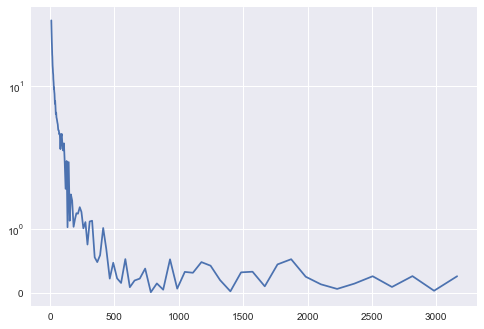

In [64]:
plt.yscale('symlog')
plt.plot(thresholdRange,error)
plt.show()

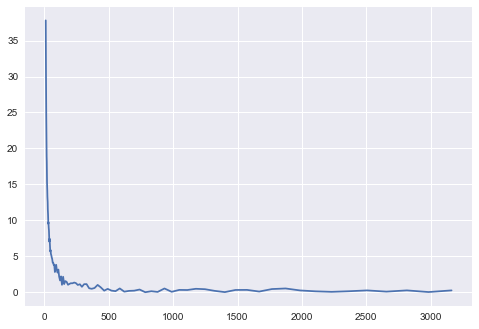

In [63]:

plt.plot(thresholdRange,error)
plt.show()

In [65]:
print(error)

[37.80710953948176, 33.72475619221753, 30.036028435537503, 27.245288137282298, 24.485256218434415, 22.74418416173705, 20.78815344918873, 18.921456204007068, 18.20585790812239, 15.271811839299913, 14.65485258029919, 14.110476763533839, 13.26553105135789, 12.555516097183613, 11.558889601874764, 10.76977730680292, 9.520969877573705, 9.750817444652405, 9.00544132631216, 8.550398976913435, 7.03079947472915, 7.447688989106722, 6.800951907650436, 5.674977996050346, 5.863881057252676, 5.337185822570299, 5.155727216981842, 4.816073929598337, 4.637406994865081, 4.124670114458751, 4.102336747617117, 3.77943348536483, 3.838989130275921, 2.8097931416563173, 3.5402803487688006, 3.820377991241201, 3.1047796953564935, 2.732556914662265, 3.1568908846536807, 2.184458870089952, 1.6382219394211552, 2.2077227938833595, 1.0314988068895101, 2.1574727184896294, 1.1338600715804275, 1.549819029006256, 1.4521105490740114, 1.0380127055516548, 1.1589851092773071, 1.2529713614025928, 1.244596348836976, 1.3478881704

In [77]:
%%time

n_sim = 428    # number of simulations to run``
n_sizeRange = np.arange(500,1300,50)  # amount of ramdom points
threshold = 500 # threshold for mandelbrot

# increase sample size by 50 

# i constant and increase sample size

errorSample = []
for n_size in n_sizeRange:
    data = []
    for sim in range(n_sim):
        re, im, n = random_mandelbrot_points(n_size, re_lim, im_lim,threshold=threshold)
        
        count_inside = np.size(np.where(n>=threshold))
    
        # monte carlo
        total_points = n_size
        avg = count_inside/total_points
        data.append(avg)
        #print(avg)
    
    prev_estimated_mean = np.sum(data)/(n_sim)
    print(prev_estimated_mean)

    A_theoritical = 1.506484

    mean = prev_estimated_mean
    rectangle_area = 6
    A_estimated = mean*rectangle_area
    errorPerSample = abs(A_theoritical - A_estimated)/(A_theoritical)*100
    errorSample.append(errorPerSample)
    
# we don't see a clear pattern with this range of sample size for number of iterations = 500

0.25359345794392524
0.2530033984706882
0.2522196261682243
0.25278576563623295
0.25365153538050733
0.25202492211838007
0.2525905373831776
0.25156679494227596
0.25373572170301145
0.2515051647811116
0.2523341121495327
0.2518647085002225
0.25299915038232795
0.25139577407557906
0.2522527258566978
0.25165233644859814
CPU times: user 54 s, sys: 144 ms, total: 54.1 s
Wall time: 30min 30s


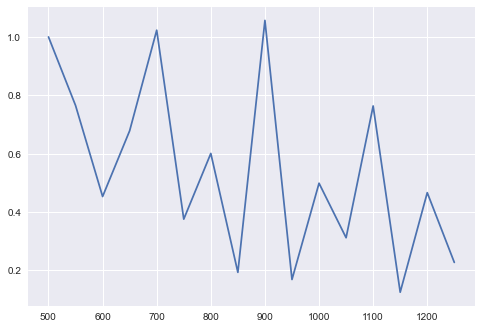

In [78]:
plt.plot(n_sizeRange,errorSample)
plt.show()

In [79]:
print(errorSample)

[1.0007904274822437, 0.7657824991257307, 0.4536229398616741, 0.6791040473976413, 1.02392141456823, 0.3760765272170407, 0.6013488559497275, 0.19361437981789634, 1.0574510063212679, 0.1690684193572454, 0.49922023049673137, 0.3122669076694536, 0.7640905773953056, 0.125500466880135, 0.4668058300112541, 0.2276837119802791]


In [76]:
print(threshold)

3162
